In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
from math import exp

In [2]:
os.chdir('../dependencies/')
from logistic_regression import logistic_regression

In [3]:
filename = 'data1'
validation_perc = 0.7
training_perc = 0.7
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

For iteration number  1  : 
	Average RMSE for alpha :  0.0  :  100.08967260510809
	Average RMSE for alpha :  0.1  :  2.389979856433998
	Average RMSE for alpha :  0.2  :  1.9849020034847984
	Average RMSE for alpha :  0.30000000000000004  :  2.1211007598956844
	Average RMSE for alpha :  0.4  :  2.2628646312147938
	Average RMSE for alpha :  0.5  :  2.675336784427143
	Average RMSE for alpha :  0.6000000000000001  :  2.158086183921099
	Average RMSE for alpha :  0.7000000000000001  :  3.611245771895745
	Average RMSE for alpha :  0.8  :  2.968047153042314
	Average RMSE for alpha :  0.9  :  3.0711287642850387

For iteration number  2  : 
	Average RMSE for alpha :  0.0  :  56.918199009695094
	Average RMSE for alpha :  0.1  :  2.0391170392022655
	Average RMSE for alpha :  0.2  :  2.4448841958307233
	Average RMSE for alpha :  0.30000000000000004  :  2.8149609130901085
	Average RMSE for alpha :  0.4  :  3.432073390697874
	Average RMSE for alpha :  0.5  :  2.911626568899884
	Average RMSE for alpha 

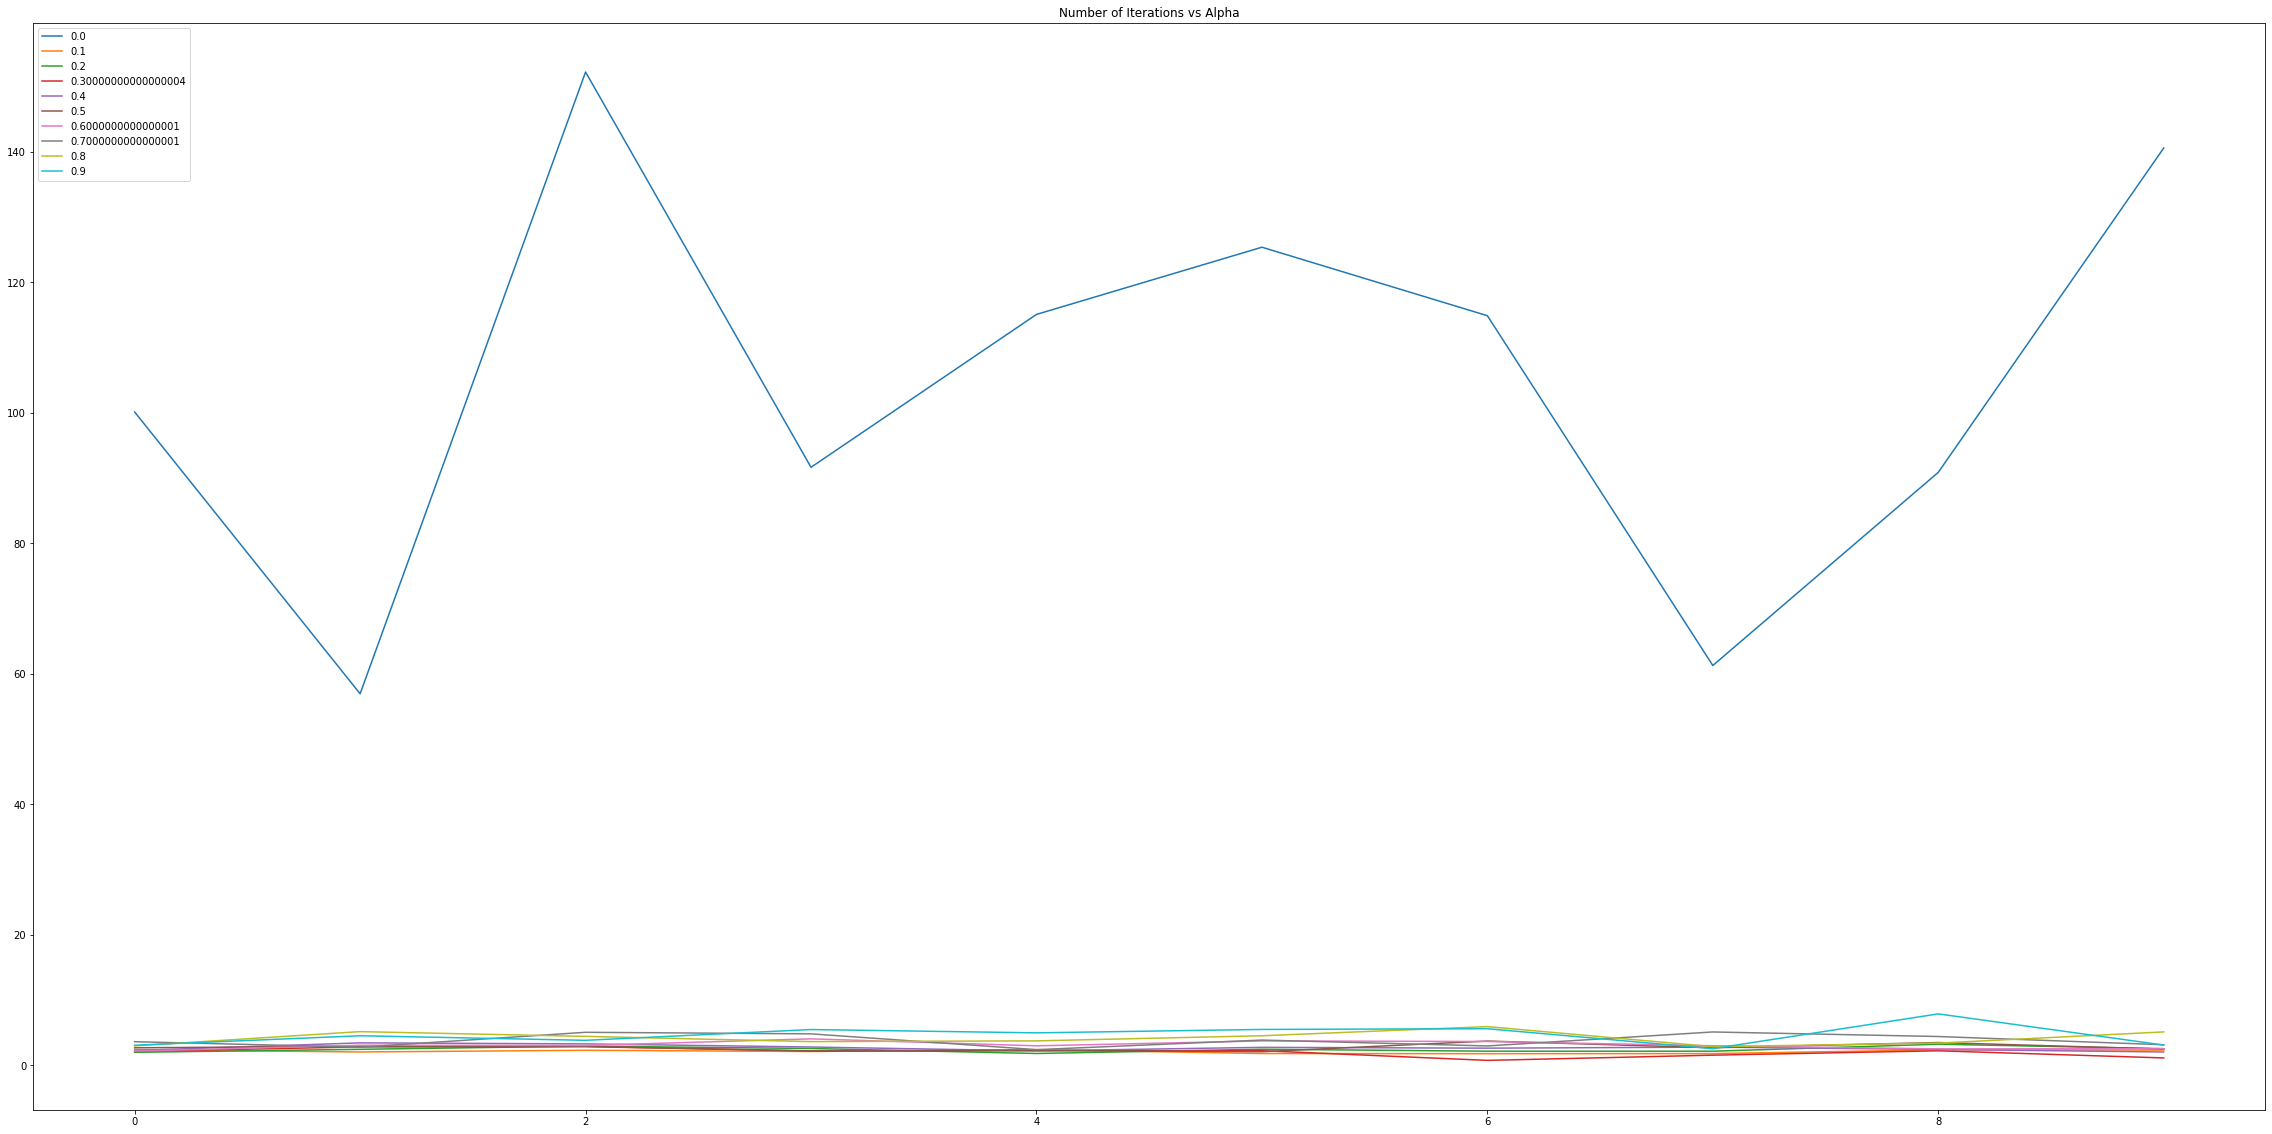

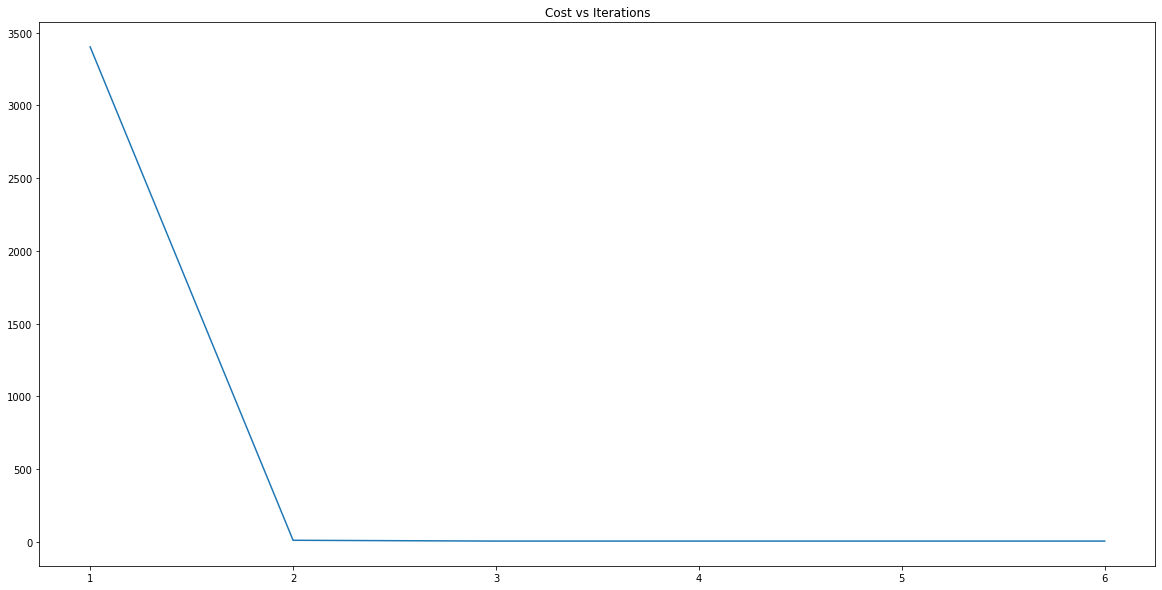

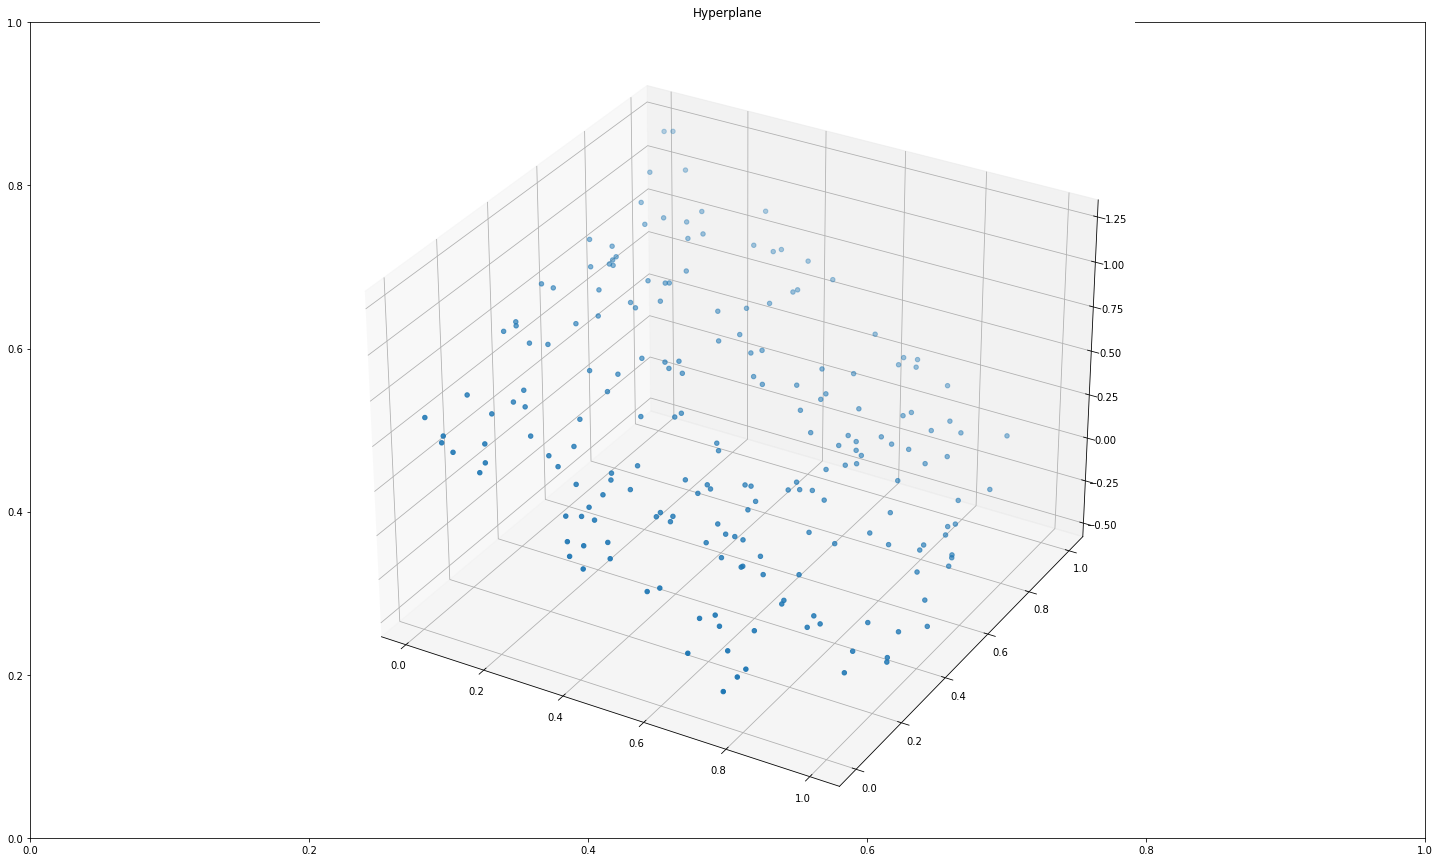

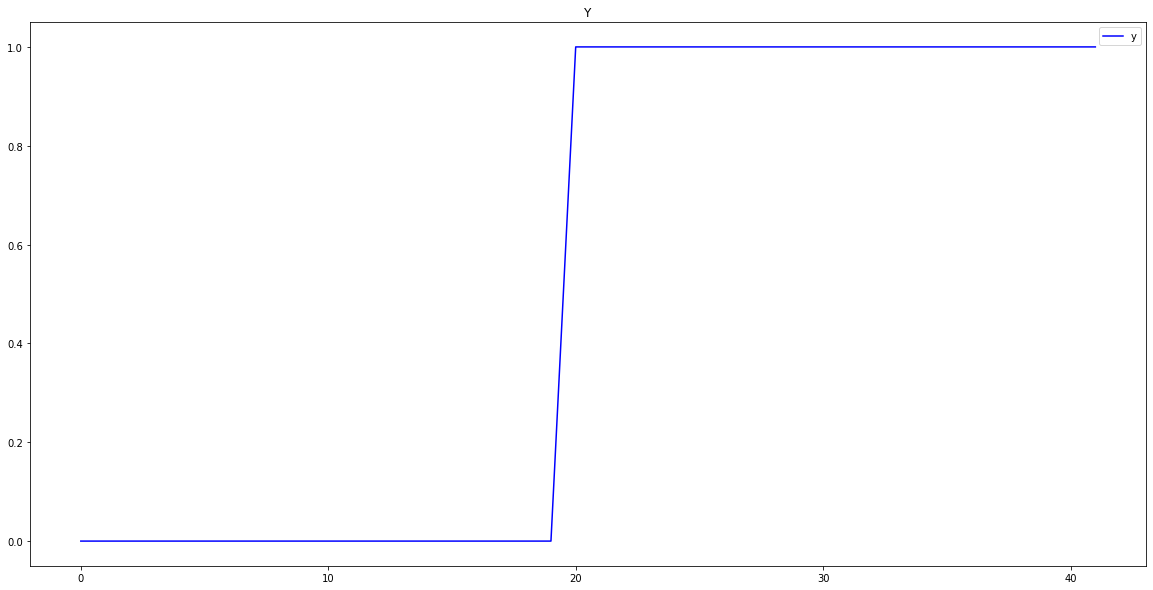

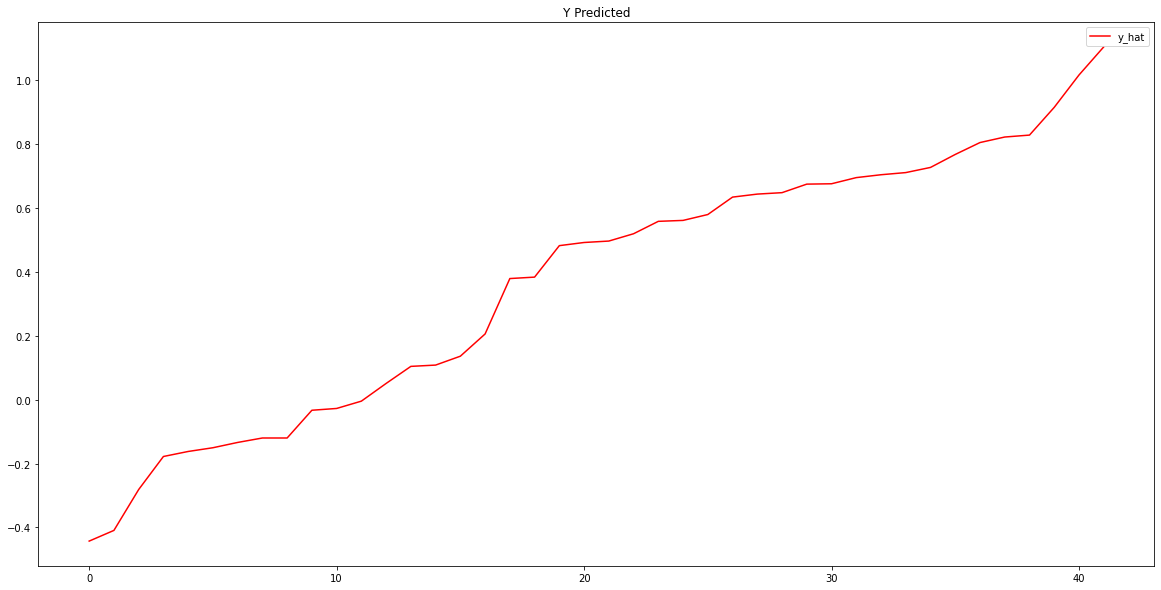

In [4]:
log_reg = logistic_regression()
log_reg.load_data(filename)
df_validation, df_test = log_reg.split_dataset(validation_perc , training_perc)
log_reg.find_weights(alphas, number_of_iterations )
log_reg.classify(df_test)